# Analysis - exp12

A wythoff stumbler-strategist hyper-parameter search. Strategist network geometry and influence rate.

In [1]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Find the files
path = "/Users/type/Code/azad/data/wythoff/exp12/"
results_path = "/Users/type/Code/azad/data/wythoff/"

files = sorted(glob(os.path.join(path, "run_*")))
files[:10]

['/Users/type/Code/azad/data/wythoff/exp12/run_0.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp12/run_1.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp12/run_10.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp12/run_100.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp12/run_101.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp12/run_102.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp12/run_103.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp12/run_104.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp12/run_105.pytorch',
 '/Users/type/Code/azad/data/wythoff/exp12/run_106.pytorch']

In [14]:
# load grid file 
grid = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")
pprint(grid)

array([[0.0000000e+00, 1.0000000e-02, 1.5000000e+01, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e-02, 1.5000000e+01, 5.5555560e+00],
       [2.0000000e+00, 1.0000000e-02, 1.5000000e+01, 1.1111111e+01],
       ...,
       [4.9700000e+02, 1.0000000e+00, 5.0000000e+02, 3.8888889e+01],
       [4.9800000e+02, 1.0000000e+00, 5.0000000e+02, 4.4444444e+01],
       [4.9900000e+02, 1.0000000e+00, 5.0000000e+02, 5.0000000e+01]])


In [3]:
model = th.load(files[0])

In [4]:
model.keys()

dict_keys(['episode', 'epsilon', 'anneal', 'gamma', 'num_episodes', 'num_stumbles', 'num_strategies', 'influence', 'stumbler_score', 'strategist_score', 'stumbler_game', 'strategist_game', 'cold_threshold', 'hot_threshold', 'learning_rate_stumbler', 'learning_rate_strategist', 'learning_rate_influence', 'strategist_state_dict', 'stumbler_player_dict', 'stumbler_opponent_dict'])

In [16]:
table = []
for fi in files:
    # Extract row_code
    row_code = int(os.path.split(fi)[-1].split('_')[-1].split('.')[0])
    hide1 = int(grid[row_code, 2])
    hide2 = int(grid[row_code, 3])
    
    # load data
    model = th.load(fi)
    row = (
        row_code, 
        model['learning_rate_influence'],
        hide1,
        hide2,
        model['stumbler_score'],
        model['strategist_score'],
        model['influence']
    )
    table.append(row)
    
pprint(table[:3])

[(0, 0.01, 15, 0, 0.418814306619602, 0.4829518795013428, 0.08),
 (1, 0.01, 15, 5, 0.654116735228747, 0.11914682388305664, 0.09),
 (10, 0.01, 68, 0, 0.46947046230986356, 0.7031507194042206, 0.07)]


In [18]:
# Sort by score
def get_score(row):
    return row[4]

table = sorted(table, key=get_score, reverse=True)
pprint(table[:20])

[(103, 0.2575, 15, 16, 0.802889322881172, 0.03530287742614746, 1.0),
 (488, 1.0, 446, 44, 0.7763769757699326, 0.9644444063305855, 0.0),
 (427, 1.0, 122, 38, 0.7704318306253733, 0.28895533084869385, 1.0),
 (127, 0.2575, 122, 38, 0.7699034794152987, 0.04416176676750183, 1.0),
 (246, 0.505, 230, 33, 0.7637830820861978, 0.09149450063705444, 1.0),
 (238, 0.505, 176, 44, 0.7633309317970701, 0.9266968667507172, 0.495),
 (338, 0.7525, 176, 44, 0.759742429470289, 0.1811847686767578, 0.7525),
 (161, 0.2575, 338, 5, 0.7568122017592941, 1.400149792432785, 0.0),
 (34, 0.01, 176, 22, 0.7562936454986972, 1.2212567329406738, 0.09),
 (119, 0.2575, 68, 50, 0.7545202857925363, 0.10202884674072266, 1.0),
 (87, 0.01, 446, 38, 0.7526507718623948, 0.15737563371658325, 0.09),
 (248, 0.505, 230, 44, 0.7503709067672037, 0.25115251541137695, 1.0),
 (342, 0.7525, 230, 11, 0.7474286261406565, 0.02129918336868286, 1.0),
 (168,
  0.2575,
  338,
  44,
  0.7424736222808651,
  0.0026330947875976562,
  0.742499999999999

In [19]:
# Save the sorted results table
f_name = os.path.join(results_path, "exp12_ranked.csv")
head = (
    'row_code', 
    'learning_rate',
    'num_hidden1',
    'num_hidden2',
    'stumbler_score',
    'strategist_score',
    'influence'
)

with open(f_name, "w") as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(head)
    
    for row in table:
        writer.writerow(row)

# Plots

## Score distributions

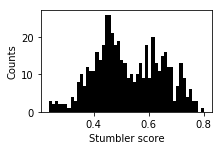

In [26]:
stumbler_score = [row[4] for row in table]

plt.figure(figsize=(3, 2))
_ = plt.hist(stumbler_score, color='black', bins=50)
_ = plt.tight_layout()
_ = plt.ylabel("Counts")
_ = plt.xlabel("Stumbler score")

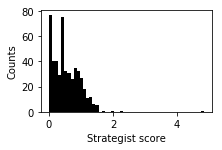

In [31]:
strategist_score = [row[5] for row in table]

plt.figure(figsize=(3, 2))
_ = plt.hist(strategist_score, color='black', bins=50)
_ = plt.tight_layout()
_ = plt.ylabel("Counts")
_ = plt.xlabel("Strategist score")

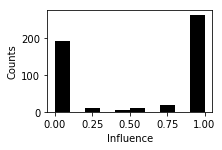

In [33]:
influence = [row[6] for row in table]

plt.figure(figsize=(3, 2))
_ = plt.hist(influence, color='black', bins=10)
_ = plt.tight_layout()
_ = plt.ylabel("Counts")
_ = plt.xlabel("Influence")

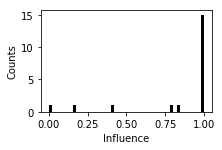

In [43]:
influence = [row[4] for row in table]
strategist_score = [row[3] for row in table]

plt.figure(figsize=(3, 2))
_ = plt.hist(scores, color='black', bins=45)
_ = plt.tight_layout()
_ = plt.ylabel("Counts")
_ = plt.xlabel("Influence")

## Strategist as a function of other parameters

In [34]:
learning_rate = [row[1] for row in table]
num_hidden1 = [row[2] for row in table]
num_hidden2 = [row[3] for row in table]

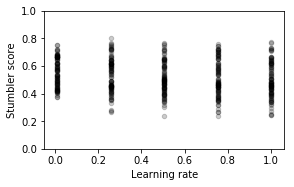

In [36]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(learning_rate, stumbler_score, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("Learning rate")
_ = plt.ylabel("Stumbler score")
_ = plt.ylim(0, 1)

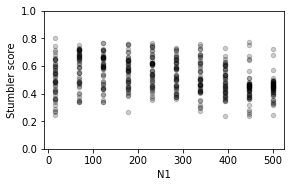

In [39]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(num_hidden1, stumbler_score, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("N1")
_ = plt.ylabel("Stumbler score")
_ = plt.ylim(0, 1)

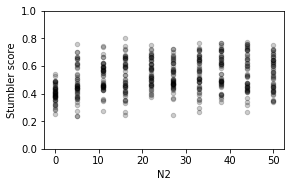

In [40]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(num_hidden2, stumbler_score, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("N2")
_ = plt.ylabel("Stumbler score")
_ = plt.ylim(0, 1)

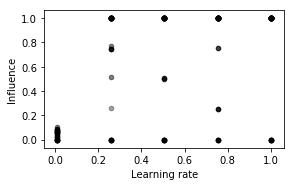

In [42]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(learning_rate, influence, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("Learning rate")
_ = plt.ylabel("Influence")

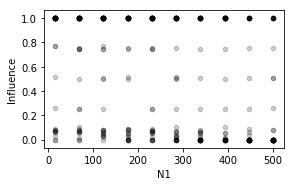

In [44]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(num_hidden1, influence, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("N1")
_ = plt.ylabel("Influence")

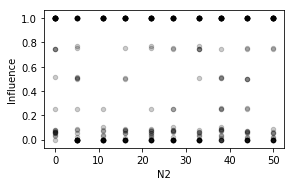

In [45]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(num_hidden2, influence, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.xlabel("N2")
_ = plt.ylabel("Influence")

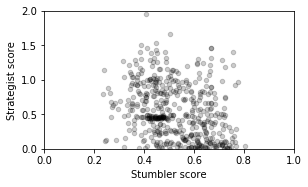

In [47]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(stumbler_score, strategist_score, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.ylabel("Strategist score")
_ = plt.xlabel("Stumbler score")
_ = plt.xlim(0, 1)
_ = plt.ylim(0, 2)

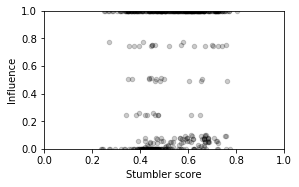

In [76]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(stumbler_score, influence, color='black', alpha=0.2, s=20)
_ = plt.tight_layout()
_ = plt.ylabel("Influence")
_ = plt.xlabel("Stumbler score")
_ = plt.xlim(0, 1)
_ = plt.ylim(0, 1)

## Shallow versus deep strategists

In [87]:
shallow_mask = np.asarray(num_hidden2) == 0
deep_mask = np.logical_not(shallow_mask)

learning_rate = np.asarray(learning_rate)

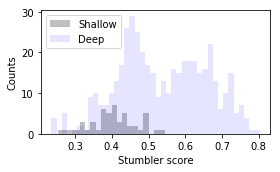

In [86]:
stumbler_score = np.asarray(stumbler_score)

plt.figure(figsize=(4, 2.5))
_ = plt.hist(stumbler_score[shallow_mask], color='grey', bins=20, label="Shallow", alpha=0.5)
_ = plt.hist(stumbler_score[deep_mask], color='blue', bins=40, label="Deep", alpha=0.1)
_ = plt.tight_layout()
_ = plt.ylabel("Counts")
_ = plt.xlabel("Stumbler score")
_ = plt.legend()
_ = plt.tight_layout()

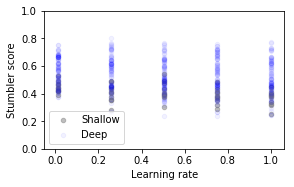

In [101]:
plt.figure(figsize=(4, 2.5))
_ = plt.scatter(learning_rate[shallow_mask], stumbler_score[shallow_mask],  
                color='grey', s=20, label="Shallow", alpha=0.5)
_ = plt.scatter(learning_rate[deep_mask], stumbler_score[deep_mask],  
                color='blue', s=20, label="Deep", alpha=0.05)
_ = plt.tight_layout()
_ = plt.xlabel("Learning rate")
_ = plt.ylabel("Stumbler score")
_ = plt.ylim(0, 1)
_ = plt.legend(loc='lower left')

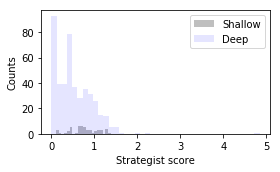

In [81]:
strategist_score = np.asarray(strategist_score)

plt.figure(figsize=(4, 2.5))
_ = plt.hist(strategist_score[shallow_mask], color='grey', bins=20, label="Shallow", alpha=0.5)
_ = plt.hist(strategist_score[deep_mask], color='blue', bins=40, label="Deep", alpha=0.1)
_ = plt.tight_layout()
_ = plt.ylabel("Counts")
_ = plt.xlabel("Strategist score")
_ = plt.legend()
_ = plt.tight_layout()

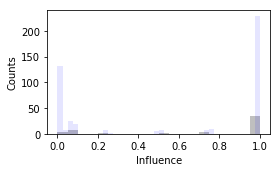

In [98]:
influence = np.asarray(influence)

plt.figure(figsize=(4, 2.5))
_ = plt.hist(influence[shallow_mask], color='grey', bins=20, label="Shallow", alpha=0.5)
_ = plt.hist(influence[deep_mask], color='blue', bins=40, label="Deep", alpha=0.1)
_ = plt.tight_layout()
_ = plt.ylabel("Counts")
_ = plt.xlabel("Influence")
_ = plt.tight_layout()